**GMM**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

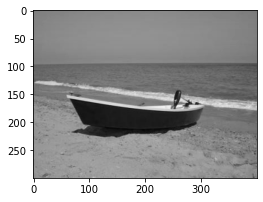

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)

#Paraetros y variables necesarias

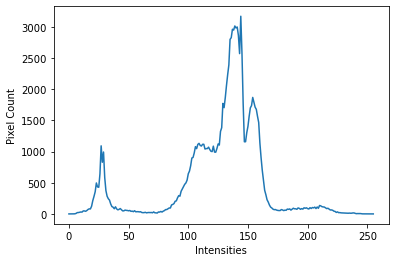

In [3]:
hist = cv2.calcHist([I],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel("Intensities")
plt.ylabel("Pixel Count")
plt.show()

Ir=I.astype(float)
Ir=Ir.ravel()

In [4]:
#Inicializar las medias 

modelos = 5
varianzaGlobal = 3

medias = [np.random.randint(0,255) for i in range(modelos)]
#print(medias)

varianzas = np.ones(modelos)*varianzaGlobal
desviaciones = np.sqrt(varianzas)

In [5]:
#Crear la función normal
def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt(2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [6]:
#Inicailizar los pesos
W = np.ones(modelos)/modelos


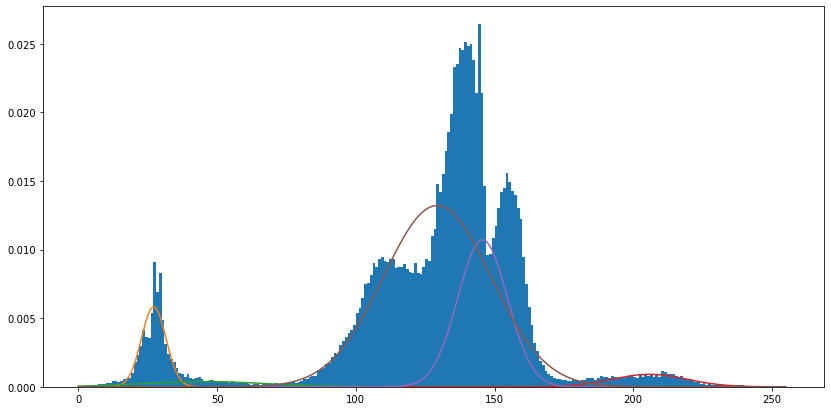

In [10]:
#Graficar los modelos iniciales
x = np.linspace(0,255,256)
fig1=plt.figure(figsize = (14,7))
sumaGauss = np.zeros([256,])

b= plt.hist(Ir,256,[0,256],density=True)
for i in range(modelos):
    sumaGauss = sumaGauss + W[i]*normal_dist(x , medias[i] , desviaciones[i])
    plt.plot(x,W[i]*normal_dist(x , medias[i] , desviaciones[i]))

plt.show()


In [16]:
longitud = len(Ir)
pdf = np.zeros((modelos,longitud)) 
#Maximizacion
gamma = []
#Sacar el promedio

maxIteraciones = 30

for iteraciones in range(maxIteraciones):   
    for model in range(modelos):
        pdf[model, :] = W[model] *normal_dist(Ir, medias[model] , desviaciones[model])

    suma_pdf = np.sum(pdf,axis=0)
#Vamos a normalizar
    gamma = pdf / suma_pdf
    
    for model in range(modelos):
        suma = np.sum(gamma[model,:])
        W[model] = suma /longitud
        medias[model]=np.dot(gamma[model,:], Ir/suma)
        #print(medias)
        desviaciones[model]=np.sqrt(np.dot(gamma[model,:],(Ir-medias[model])**2)/suma)
      


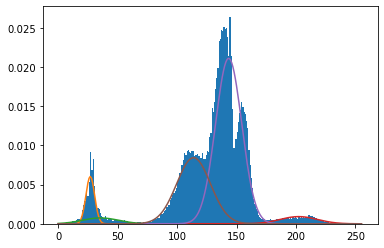

In [17]:
b= plt.hist(Ir,256,[0,256],density=True)
for i in range(modelos):
    sumaGauss = sumaGauss + W[i]*normal_dist(x , medias[i] , desviaciones[i])
    plt.plot(x,W[i]*normal_dist(x , medias[i] , desviaciones[i]))

plt.show()